In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

In [2]:
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)
properties = properties.drop(0)
properties_v1 = properties.loc[:,:'Westminster']
properties_v1 = properties_v1.T

In [3]:
properties_v1 = properties_v1.drop('City of London')
properties_v1 = properties_v1.rename({'Unnamed: 0':'London_Borough'})
properties_v1 = properties_v1.reset_index()
properties_v1.columns = properties_v1.iloc[0]
properties_v1 = properties_v1.drop(0)

In [4]:
properties_v2= pd.melt(properties_v1, id_vars= 'London_Borough')
properties_v2 = properties_v2.rename(columns = {0:'Month','value' : 'Average price'})
properties_v2['Average price'] = pd.to_numeric(properties_v2['Average price'])
properties_v2['Year'] = properties_v2['Month'].apply(lambda t: t.year)
properties_v2 = properties_v2.groupby(['London_Borough','Year']).mean()
properties_v3 = properties_v2.reset_index()


In [5]:
def create_price_ratio(d):

    a2000 = float(d['Average price'][d['Year']==2000])

    a2020 = float(d['Average price'][d['Year']==2020])
    ratio = a2020/a2000
    return ratio

In [6]:
result={}
for name in properties_v3['London_Borough'].unique():
    result[name] = create_price_ratio(properties_v3[properties_v3['London_Borough']==name])

a = pd.Series(result).to_frame()
a = a.reset_index()
a.rename(columns={'index':'Borough', 0:'compared with 2000'}, inplace=True)
top15  =a.sort_values(by='compared with 2000',ascending=False).head(15)

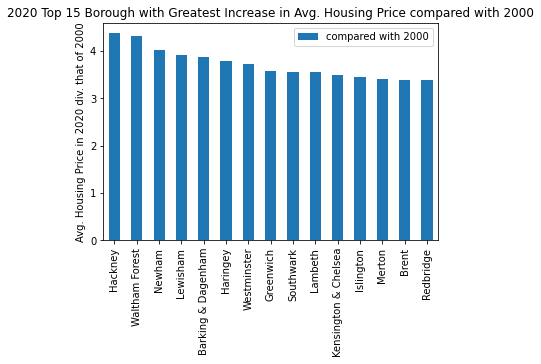

In [7]:
ax = top15[['Borough','compared with 2000']].plot(kind='bar')
ax.set_xticklabels(top15.Borough)
ax.set_ylabel('Avg. Housing Price in 2020 div. that of 2000')
ax.set_title('2020 Top 15 Borough with Greatest Increase in Avg. Housing Price compared with 2000')
plt.show()
